In [ ]:
import os
import sqlite3
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set root, project, and working directories
rd = '/content/drive'
ad = '/Shareddrives/Hasenstab Lab/Data/COPDGene'
wd = '/univariate_histograms'
hd = '/histograms'

drive.mount(rd, force_remount = True)

sf = '/19000101'
cases = os.listdir(f'{rd}{ad}{hd}')

Mounted at /content/drive


In [ ]:
# Change directory
os.chdir(f'{rd}{ad}{wd}')

In [ ]:
# Connect to existing database
db_name = 'univariate_histograms'
conn = sqlite3.connect(db_name)
crsr = conn.cursor()

In [ ]:
insp_df = pd.read_csv('insp_copd_merge_demo.csv')
exp_df = pd.read_csv('exp_copd_merge.csv')
adm_df = pd.read_csv('adm_copd_merge.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2133) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(insp_df)
#gold_stage = -2 need to remove, we can leave in -1 should fall under gold 0

8995

#Splitting Biographical Information

In [ ]:
for col in insp_df.columns:
  print(col)

Unnamed: 0
Unnamed: 0.1
idx
-1500
-1499
-1498
-1497
-1496
-1495
-1494
-1493
-1492
-1491
-1490
-1489
-1488
-1487
-1486
-1485
-1484
-1483
-1482
-1481
-1480
-1479
-1478
-1477
-1476
-1475
-1474
-1473
-1472
-1471
-1470
-1469
-1468
-1467
-1466
-1465
-1464
-1463
-1462
-1461
-1460
-1459
-1458
-1457
-1456
-1455
-1454
-1453
-1452
-1451
-1450
-1449
-1448
-1447
-1446
-1445
-1444
-1443
-1442
-1441
-1440
-1439
-1438
-1437
-1436
-1435
-1434
-1433
-1432
-1431
-1430
-1429
-1428
-1427
-1426
-1425
-1424
-1423
-1422
-1421
-1420
-1419
-1418
-1417
-1416
-1415
-1414
-1413
-1412
-1411
-1410
-1409
-1408
-1407
-1406
-1405
-1404
-1403
-1402
-1401
-1400
-1399
-1398
-1397
-1396
-1395
-1394
-1393
-1392
-1391
-1390
-1389
-1388
-1387
-1386
-1385
-1384
-1383
-1382
-1381
-1380
-1379
-1378
-1377
-1376
-1375
-1374
-1373
-1372
-1371
-1370
-1369
-1368
-1367
-1366
-1365
-1364
-1363
-1362
-1361
-1360
-1359
-1358
-1357
-1356
-1355
-1354
-1353
-1352
-1351
-1350
-1349
-1348
-1347
-1346
-1345
-1344
-1343
-1342
-1341
-1340
-1339


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
insp_df.iloc[:, 2196:2197]
#insp_df.iloc[:, 2024:2025] == 0

,alcohol_how_often
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8990,NaN
8991,NaN
8992,NaN
8993,NaN


In [ ]:
demo_gender = insp_df.iloc[:,2020:2021]
#one hot encoding in gender
demo_eth= insp_df.iloc[:,2021:2022]
demo_height = insp_df.iloc[:,2041:2042]
demo_weight = insp_df.iloc[:,2042:2043]
demo_age = insp_df.iloc[:,2027:2028]
demo_smoker_status = insp_df.iloc[:, 2025:2026] 



#include age to the model
#age_enroll[:,2029:2030]
#age_baseline[:,2027:2028]
#age_visit[:,2028:2029]
#smokecignow
#smokementhol
#smoking_status
#SmokPipeReg
#eCigaretteStill
#SmokCigarReg

In [ ]:
print(demo_eth)

      race
0        1
1        1
2        1
3        1
4        1
...    ...
8990     2
8991     2
8992     2
8993     2
8994     2

[8995 rows x 1 columns]


In [ ]:
ohe = OneHotEncoder(sparse=False)
demo_eth = ohe.fit_transform(demo_eth)
demo_smoker_status = ohe.fit_transform(demo_smoker_status)

In [ ]:
print(demo_eth)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
np.unique(insp_df.iloc[:,2021:2022])

array([1, 2])

In [ ]:
demo_gender = demo_gender - 1
#demo_eth = demo_eth/np.max(insp_df.iloc[:,2022:2023]) #one hot encoded variable
demo_height = demo_height/np.max(insp_df.iloc[:,2041:2042])
demo_weight = demo_weight/np.max(insp_df.iloc[:,2042:2043])
demo_age = demo_age/np.max(insp_df.iloc[:,2027:2028])

In [ ]:
np.sum(demo_smoker_status, axis = 0)
#can remove one of the columns in each,, we can leave it in for regularlization

array([ 106., 4235., 4654.])

In [ ]:
demo_all = np.concatenate([demo_gender, demo_height, demo_weight, demo_eth, demo_age, demo_smoker_status], -1) #demo_weight, demo_smoker_ever, removed due to only one value discrepancy
demo_all.shape

(8995, 9)

##Creating Training, Validation, and Testing set for all data

In [ ]:
#should this be 2003?
insp_df_all = np.array(insp_df.iloc[:,2:2002])
print(insp_df_all)


[[   1    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   3    0    0 ...    0    0    0]
 ...
 [9108    0    0 ...    0    0    0]
 [9109    0    0 ...    0    0    0]
 [9110    0    0 ...    0    0    0]]


In [ ]:
exp_df_all = np.array(exp_df.iloc[:,2:2002])
adm_df_all = np.array(adm_df.iloc[:,2:2002])

In [ ]:
spiro_df_all = np.array(adm_df.iloc[:,2005:2008])
print(spiro_df_all)

[[  1.165   3.266  43.3  ]
 [  2.921   3.805 112.3  ]
 [  1.814   3.202  59.3  ]
 ...
 [  1.605   2.171  81.5  ]
 [  3.138   3.916  94.8  ]
 [  2.378   3.418  80.1  ]]


In [ ]:
x_temp = np.stack([insp_df_all,exp_df_all,adm_df_all], -1)
x_temp = x_temp/np.max(x_temp)
y_temp = spiro_df_all

In [ ]:
np.max(y_temp, axis=0)

array([  5.502,   7.719, 159.9  ])

In [ ]:
#Standardizes? so that all values are between 0 and 1
y_max = (np.max(y_temp[:,0]), np.max(y_temp[:,1]), np.max(y_temp[:,2]))
y_min = (np.min(y_temp[:,0]), np.min(y_temp[:,1]), np.min(y_temp[:,2]))
y_temp[:,0] = (y_temp[:,0] - np.min(y_temp[:,0])) / (np.max(y_temp[:,0]) - np.min(y_temp[:,0]))
y_temp[:,1] = (y_temp[:,1] - np.min(y_temp[:,1])) / (np.max(y_temp[:,1]) - np.min(y_temp[:,1]))
y_temp[:,2] = (y_temp[:,2] - np.min(y_temp[:,2])) / (np.max(y_temp[:,2]) - np.min(y_temp[:,2]))

In [ ]:
num_training_sample = 6900

train_index = np.random.choice(range(x_temp.shape[0]),size = 6900)

In [ ]:
order_index = np.arange(0, x_temp.shape[0])
np.random.shuffle(order_index)
train_index = order_index[0:6900]
valid_index = order_index[6901:(6901+946)]

test_index = order_index[(6900 + 946):]

In [ ]:
x_train = x_temp[train_index]
y_train = y_temp[train_index]
x_valid = x_temp[valid_index]
y_valid = y_temp[valid_index]

#need to creat x test and y test

In [ ]:
demo_train = demo_all[train_index]
demo_valid = demo_all[valid_index]

##Neural Networks

In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import tf
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input
from keras.layers import Concatenate

In [ ]:
es = EarlyStopping(
    monitor='val_loss',
    patience = 2000,
    verbose = 2,
    mode = 'min',
    restore_best_weights = True
)

In [ ]:
#on epoch end it will print every epoch at the end
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    print(logs.keys())

In [ ]:
save_callback = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/Shareddrives/Hasenstab Lab/Data/COPDGene/univariate_histograms/CNN_Callback/weights4.h5', 
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

#weights 1 height, weight, gender, ever had a smoke
#weights 2 height, weight, gender, ever had a smoke
#wegiths 3 height, weight, ethnicity
#weights 4 height, weight, ethnicity, gender, smoker type, age

In [ ]:
#Model Architect 1
#model.add(Dropout(0.5)) prevents overfitting, regularization 
n_samp = 6900
hist_size = 2000
n_channels = 3
n_outputs = 3
# number of layers, filters, dense layers, number of neurons in dense layer '100', removing dropout or changing .2 to.5 only, learning rate is important to tune. Could takeout dropout
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(hist_size,n_channels))) #filters og 32
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu')) #filters og 64
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu')) #Should only be double from filters 64
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu')) 
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))  # layer
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='linear'))
model.compile(loss='mse', optimizer= Adam(learning_rate=1e-2))

In [ ]:
#Model Architect 2
n_outputs = 3
inp = Input((2000,3)) #can mess with number of demographics put in.
inp2 = Input((9,))#number of demographics

x = Conv1D(filters = 32, kernel_size = 3, activation = 'relu')(inp)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 32, kernel_size = 3, activation = 'relu')(inp)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 32, kernel_size = 3, activation = 'relu')(inp)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 32, kernel_size = 3, activation = 'relu')(inp)
#x = Dropout(0.5)(x)
x = MaxPooling1D(pool_size = 2)(x)
#x = Dropout(0.5)(x)
x = Conv1D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling1D(pool_size = 2)(x)
#x = Dropout(0.5)(x)
x = Conv1D(filters = 128, kernel_size = 3, activation = 'relu')(x)
#x = Dropout(0.5)(x)
x = MaxPooling1D(pool_size = 2)(x)
x = Conv1D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling1D(pool_size = 2)(x)#put more of these 
x = Conv1D(filters = 128, kernel_size = 3, activation = 'relu')(x)
#x = Dropout(0.5)(x)
x = MaxPooling1D(pool_size = 2)(x)#put more of these 
#x = Dropout(0.5)(x)
x = Flatten()(x)
#print(inp2)
x = Concatenate(axis=-1)([x, inp2])
x =Dense(100, activation = 'relu')(x) #same as what's inputted in the first architecture, can change dense number but is memory heavy
x = Dense(n_outputs, activation = 'linear')(x) #will take 31,000 features and take inputs from demo variables and concat and then predicting, gonna need more dense layers, and reduce 
model = Model([inp, inp2], x)
model.compile(loss='mse', optimizer= Adam(learning_rate=1e-6))


In [ ]:
#model fit Architect 2
model.fit([x_train,demo_train], y_train, validation_data = [[x_valid,demo_valid], y_valid], epochs = 10000, callbacks=[save_callback,CustomCallback(),es])

Streaming output truncated to the last 5000 lines.
dict_keys(['loss', 'val_loss'])
216/216 [==============================] - 2s 11ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 2902/10000
211/216 [============================>.] - ETA: 0s - loss: 0.0066
Epoch 2902: val_loss did not improve from 0.00631
dict_keys(['loss', 'val_loss'])
216/216 [==============================] - 2s 11ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 2903/10000
213/216 [============================>.] - ETA: 0s - loss: 0.0065
Epoch 2903: val_loss did not improve from 0.00631
dict_keys(['loss', 'val_loss'])
216/216 [==============================] - 2s 11ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 2904/10000
213/216 [============================>.] - ETA: 0s - loss: 0.0066
Epoch 2904: val_loss did not improve from 0.00631
dict_keys(['loss', 'val_loss'])
216/216 [==============================] - 2s 11ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 2905/10000
213/216 [============================>.] - ET

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2000, 3)]    0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 1998, 32)     320         ['input_1[0][0]']                
                                                                                                  
 max_pooling1d_3 (MaxPooling1D)  (None, 999, 32)     0           ['conv1d_3[0][0]']               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 997, 64)      6208        ['max_pooling1d_3[0][0]']        
                                                                                              

In [ ]:
#Model Fit Architect 1
model.fit(x_train, y_train, validation_data = [x_valid, y_valid], epochs = 5000, callbacks=[save_callback,CustomCallback(),es])

Epoch 1/5000


ValueError: ignored

In [ ]:
model.load_weights('/content/drive/Shareddrives/Hasenstab Lab/Data/COPDGene/univariate_histograms/CNN_Callback/weights4.h5')

In [ ]:
pred_valid = model.predict([x_valid, demo_valid])
pred_valid.shape

(946, 3)

In [ ]:
#creating new variable to represent y_valid
y_valid_native = y_valid + 0.

In [ ]:
y_valid_native[:,0] = (y_valid[:,0] * (y_max[0] - y_min[0])) + y_min[0]
y_valid_native[:,1] = (y_valid[:,1] * (y_max[1] - y_min[1])) + y_min[1]
y_valid_native[:,2] = (y_valid[:,2] * (y_max[2] - y_min[2])) + y_min[2]

In [ ]:
pred_valid_native = pred_valid + 0.

In [ ]:
pred_valid_native[:,0] = (pred_valid[:,0] * (y_max[0] - y_min[0])) + y_min[0]
pred_valid_native[:,1] = (pred_valid[:,1] * (y_max[1] - y_min[1])) + y_min[1]
pred_valid_native[:,2] = (pred_valid[:,2] * (y_max[2] - y_min[2])) + y_min[2]

In [ ]:
pred_ratio = pred_valid_native[:,0] / pred_valid_native[:,1]

In [ ]:
y_ratio = y_valid_native[:,0] / y_valid_native[:,1]

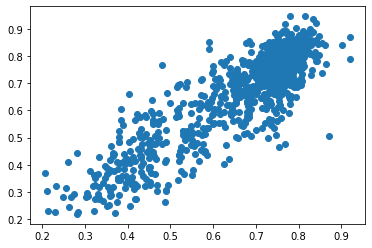

In [ ]:
plt.scatter(pred_ratio,y_ratio)

In [ ]:
#preliminary predictive accuracy
(np.sum((pred_ratio > 0.7) & (y_ratio > 0.7)) + np.sum((pred_ratio < 0.7) & (y_ratio < 0.7))) / pred_ratio.shape[0]

0.8403805496828752

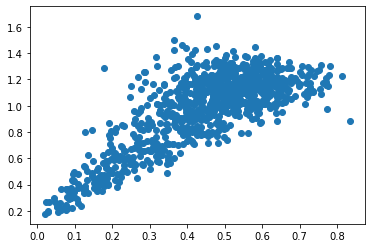

In [ ]:
plt.scatter(y_valid[:,2], y_valid[:,0]/y_valid[:,1])

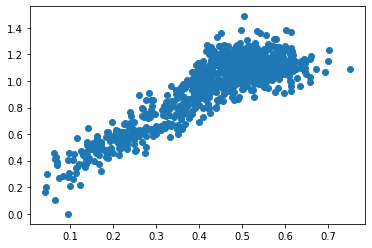

In [ ]:
plt.scatter(pred_valid[:,2], pred_valid[:,0]/pred_valid[:,1])

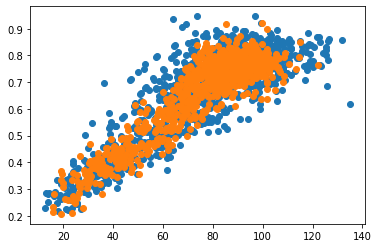

In [ ]:
plt.scatter(y_valid_native[:,2], (y_valid_native[:,0]/y_valid_native[:,1]))
plt.scatter(pred_valid_native[:,2], (pred_valid_native[:,0]/pred_valid_native[:,1]))

Converting to Gold Stage

In [ ]:
conditions1 = [
              (((y_valid_native[:,0]/y_valid_native[:,1])) >.7),
              (y_valid_native[:,2] >= 80) & ((y_valid_native[:,0]/y_valid_native[:,1]) <=.7),
              (y_valid_native[:,2] < 80) & (y_valid_native[:,2] >= 50) & ((y_valid_native[:,0]/y_valid_native[:,1]) <=.7),
              (y_valid_native[:,2] < 60) & (y_valid_native[:,2] >= 40) & ((y_valid_native[:,0]/y_valid_native[:,1]) <=.7),
              (y_valid_native[:,2] < 40) & ((y_valid_native[:,0]/y_valid_native[:,1]) <=.7)
              ]

In [ ]:
sum((y_valid_native[:,2] <= 80) & (y_valid_native[:,2] >= 50) & ((y_valid_native[:,0]/y_valid_native[:,1]) <=.7))

189

In [ ]:
gold_stage = ['0','1', '2', '3', '4']

In [ ]:
y_valid_stage = np.select(conditions1, gold_stage, default = np.nan)

In [ ]:
y_valid_stage.shape

(946,)

In [ ]:
conditions2 = [
              (((pred_valid_native[:,0]/pred_valid_native[:,1])) >.7),
              (pred_valid_native[:,2] > 80) & ((pred_valid_native[:,0]/pred_valid_native[:,1]) <=.7),
              (pred_valid_native[:,2] <= 80) & (pred_valid_native[:,2] >= 50) & ((pred_valid_native[:,0]/pred_valid_native[:,1]) <=.7),
              (pred_valid_native[:,2] <= 50) & (pred_valid_native[:,2] >= 30) & ((pred_valid_native[:,0]/pred_valid_native[:,1]) <=.7),
              (pred_valid_native[:,2] < 30) & ((pred_valid_native[:,0]/pred_valid_native[:,1]) <=.7)
              ]

In [ ]:
pred_valid_stage = np.select(conditions2, gold_stage, default = np.nan)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
results = confusion_matrix(y_valid_stage,pred_valid_stage)

In [ ]:
print(results)

[[465  21  38   2   0]
 [ 35  19  27   0   0]
 [ 49  14  94  31   0]
 [  5   0  19  22   2]
 [  1   0  13  57  32]]


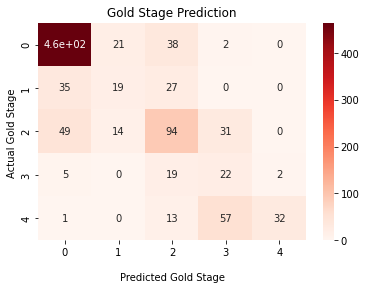

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(results, annot=True, cmap='Reds')

ax.set_title('Gold Stage Prediction');
ax.set_xlabel('\nPredicted Gold Stage')
ax.set_ylabel('Actual Gold Stage ');

## Gold Stage labels 
ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])

## Display the visualization of the Confusion Matrix.
plt.show()

Pull the individual patient and look at the curves and see if there's an identifiable pattern. If they look healthy based on the curve.  there maybe subtle features in the image themselves that indicate otherwise. 

In [ ]:
#Sanity Check
#Gold Stage 0 Predict
print(sum((pred_valid_native[:,0]/pred_valid_native[:,1]) >.7))
#Gold Stage 0 Valid
print(sum((y_valid_native[:,0]/y_valid_native[:,1]) >.7))
#Gold Stage 1 Predict
print(sum((pred_valid_native[:,2] >= 80) & ((pred_valid_native[:,0]/pred_valid_native[:,1]) <=.7)))
#Gold Stage 1 Valid
print(sum((y_valid_native[:,2] >= 80) & ((y_valid_native[:,0]/y_valid_native[:,1]) <=.7)))
#Gold Stage 2 Predict
print(sum((pred_valid_native[:,2] <= 80) & (pred_valid_native[:,2] >= 50) & ((pred_valid_native[:,0]/pred_valid_native[:,1]) <.7)))
#Gold Stage 2 Valid
print(sum((y_valid_native[:,2] <= 80) & (y_valid_native[:,2] >= 50) & ((y_valid_native[:,0]/y_valid_native[:,1]) <=.7)))
#Gold Stage 3 Predict
(sum((pred_valid_native[:,2] < 60) & (pred_valid_native[:,2] >= 40) & ((pred_valid_native[:,0]/pred_valid_native[:,1]) <.7)))
#Gold Stage 3 Valid
print(sum((y_valid_native[:,2] < 60) & (y_valid_native[:,2] >= 40) & ((y_valid_native[:,0]/y_valid_native[:,1]) <.7)))

555
526
54
81
191
189
106


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
recall = recall_score(y_valid_stage,pred_valid_stage, average='macro')
print('Recall: %.3f' % recall)

Recall: 0.478


In [ ]:
precision = precision_score(y_valid_stage,pred_valid_stage, average='macro')
print('Precision: %.3f' % precision)

Precision: 0.564


In [ ]:
score = f1_score(y_valid_stage,pred_valid_stage, average='macro')
print('F-Measure: %.3f' % score)

F-Measure: 0.476


In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [ ]:
accuracy(results)

0.6680761099365751

In [ ]:
#Gold Stage 0 and 1
GS_0 = np.sum(results[0,0:2]) 
#Gold stage 0 and 1 and 2
GS_1 = np.sum(results[1,0:3])
#Gold Stage 1 and 2 and 3
GS_2 = np.sum(results[2,1:4])
#Gold Stage 2 and 3 and 4
GS_3 = np.sum(results[3,2:5])
#Gold stage 3 and 4
GS_4 = np.sum(results[4,3:5])
#Total
total_pred= GS_0+GS_1+ GS_2+GS_3+GS_4


In [ ]:
#accuracy within +- one gold stage 
accuracy = total_pred/results.sum()
print(accuracy)

0.8858350951374208


In [ ]:
print(results[0, 0:2])
print(results[1,0:3])
print(results[2,1:4])
print(results[3,2:5])
print(results[4,3:5])

[465  21]
[35 19 27]
[14 94 31]
[19 22  2]
[57 32]


Next steps: Binary gold stage comparing 0 gold stage to the rest summarize accuracy of gold 0 than not, convert gold stage 0 as a no 1,2,3,4, is yes. 89% vs not in another paper, we can do better. 

INcorporating demographics 

In [ ]:
print(results)

[[465  21  38   2   0]
 [ 35  19  27   0   0]
 [ 49  14  94  31   0]
 [  5   0  19  22   2]
 [  1   0  13  57  32]]


In [ ]:
results[0,0]

465

In [ ]:
#Comparison of binary gold stage 0 to total
(np.sum(results[1:5,1:5]) + results[0,0]) / np.sum(results)
#confusing gold zeros rather than others gold zero patient and gold 1 patient make look similar, classified zero or one vs two to four

0.8403805496828752

In [ ]:
np.sum(results[1:5, 0:1])
print(results[1,1])

19


In [ ]:
#Comparison binary of gold 1 vs not
(np.sum(results[2:5, 0:1]) + np.sum(results[0:1, 2:5]) + np.sum(results[2:5,2:5]) + results[0,0] + results[1,1]) / np.sum(results)

0.8773784355179705

In [ ]:
results[2:5, 0:1]

array([[49],
       [ 5],
       [ 1]])

In [ ]:
print(np.sum(results))

946


:create a notebook and only put relevant stuff that you need

Look into binary gold stage becuase it should be higher.

Confusing classifcation of gold 1 those that are, gold 0 v.s. not and gold 1 vs not

shapley value, perturbation approach to determine, based on game theory and can be used to evaluate neural networks 
variable importance measure of random forrest